In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from datetime import timedelta

--- Validation ---
MAE: 1.9882
RMSE: 7.0272
R^2: 0.9800

--- Test ---
MAE: 6.6016
RMSE: 90.7652
R^2: 0.7426



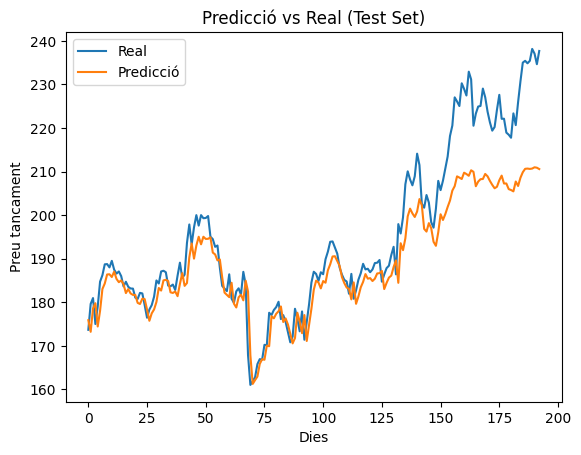

In [16]:
ticker = "Amazon"
# 1. DESCARREGAR DADES
data = pd.read_csv("Conjunt de dades Preprocessades/Datasets/Amazon_Stock_Price_output.csv")

data = data[['Close']].dropna()
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)

# 2. PREPARAR DADES
scaler = StandardScaler()
X = scaler.fit_transform(data[['Close']])
y = data['Target'].values

# 3. DIVISIÓ TRAIN / VALIDATION / TEST
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.15)
X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

# 4. ENTRENAR SVM
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.01)
model.fit(X_train, y_train)

# 5. VALIDACIÓ I TEST
val_pred = model.predict(X_val)
test_pred = model.predict(X_test)

# 6. MÈTRIQUES
def print_metrics(y_true, y_pred, title):
    print(f"--- {title} ---")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"RMSE: {mean_squared_error(y_true, y_pred):.4f}")
    print(f"R^2: {r2_score(y_true, y_pred):.4f}\n")

print_metrics(y_val, val_pred, "Validation")
print_metrics(y_test, test_pred, "Test")

# 7. GRÀFIQUES COMPARATIVES
plt.figure()
plt.plot(y_test, label='Real')
plt.plot(test_pred, label='Predicció')
plt.title('Predicció vs Real (Test Set)')
plt.xlabel('Dies')
plt.ylabel('Preu tancament')
plt.legend()
plt.show()


C:\Users\jesus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\jesus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\jesus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\jesus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-pac

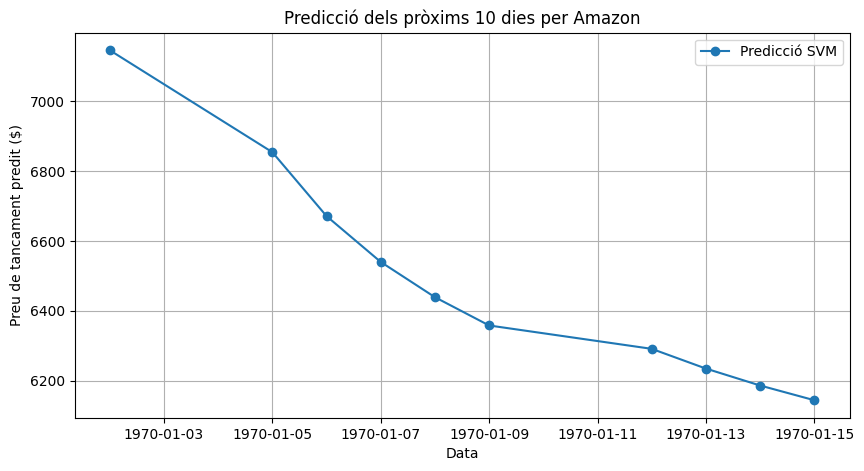

In [22]:
# 5. PREDICCIÓ DEL FUTUR (10 DIES)
last_input = data['Close'].values[-1]
future_inputs = [last_input]
future_preds = []

for _ in range(10):
    scaled_input = scaler.transform([[future_inputs[-1]]])
    pred = model.predict(scaled_input)[0]
    future_preds.append(pred)
    future_inputs.append(pred)

# 🔁 DESNORMALITZAR
future_preds_real = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1)).flatten()

# 6. DATES FUTURES REALS (borsa)
future_dates = pd.bdate_range(start=data.index[-1] + pd.Timedelta(days=1), periods=10)

# 7. GRÀFICA
plt.figure(figsize=(10, 5))
plt.plot(future_dates, future_preds_real, marker='o', label='Predicció SVM')
plt.title(f'Predicció dels pròxims 10 dies per {ticker}')
plt.xlabel('Data')
plt.ylabel('Preu de tancament predit ($)')
plt.grid(True)
plt.legend()
plt.show()
